### Evaluation Project - 3


  # HR Analytics Project- Understanding the Attrition in HR
  
#### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead,**it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.**

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

#### Note: You can find the dataset in the link below.

#### Downlaod Files:

    https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

## Importing required liabraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

#### geeting data from source and converting it into dataframe

In [2]:
hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking shape of our data

hr.shape

(1470, 35)

In [4]:
# Checking some additonla information of our data

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking if our data set have any null values

hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Our data have no null values

### Grouping all common elements of each column

In [6]:
print('-'*35)
print (hr.Attrition.value_counts())
print('-'*35)
print (hr.BusinessTravel.value_counts())
print('-'*35)
print (hr.Department.value_counts())
print('-'*35)
print (hr.EducationField.value_counts())
print('-'*35)
print (hr.Gender.value_counts())
print('-'*35)
print (hr.JobRole.value_counts())
print('-'*35)
print (hr.MaritalStatus.value_counts())
print('-'*35)
print (hr.Over18.value_counts())
print('-'*35)
print (hr.OverTime.value_counts())

-----------------------------------
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
-----------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             8

In [7]:
hr.replace ({'Attrition':{'Yes':1,'No':0}},inplace = True)
hr.replace ({'BusinessTravel':{'Travel_Rarely':0,'Travel_Frequently':1, 'Non-Travel':2}},inplace = True)
hr.replace ({'Department':{'Research & Development':0,'Sales':1, 'Human Resources':2}},inplace = True)
hr.replace ({'EducationField':{'Life Sciences':0,'Medical':1, 'Marketing':2, 'Technical Degree':3, 'Other':4,
                             'Human Resources':5 }},inplace = True)
hr.replace ({'Gender':{'Male':0,'Female':1}},inplace = True)
hr.replace ({'JobRole':{'Sales Executive':0,'Research Scientist':1, 'Laboratory Technician':2, 'Manufacturing Director':3,
                      'Healthcare Representative':4, 'Manager':5,'Sales Representative':6, 'Research Director':7,
                       'Human Resources':8}},inplace = True)
hr.replace ({'MaritalStatus':{'Married':1,'Single':0, 'Divorced':2}},inplace = True)
hr.replace ({'Over18':{'Y':1}},inplace = True)
hr.replace ({'OverTime':{'Yes':1,'No':0}},inplace = True)

In [8]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [10]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,0.392517,0.665455,0.0,0.00,0.0,1.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,0.389116,0.568893,0.0,0.00,0.0,1.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,1.116327,1.289616,0.0,0.00,1.0,2.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


### DATA PREPROCESSING AND EDA (EXPORATORY DATA ANALYSIS)

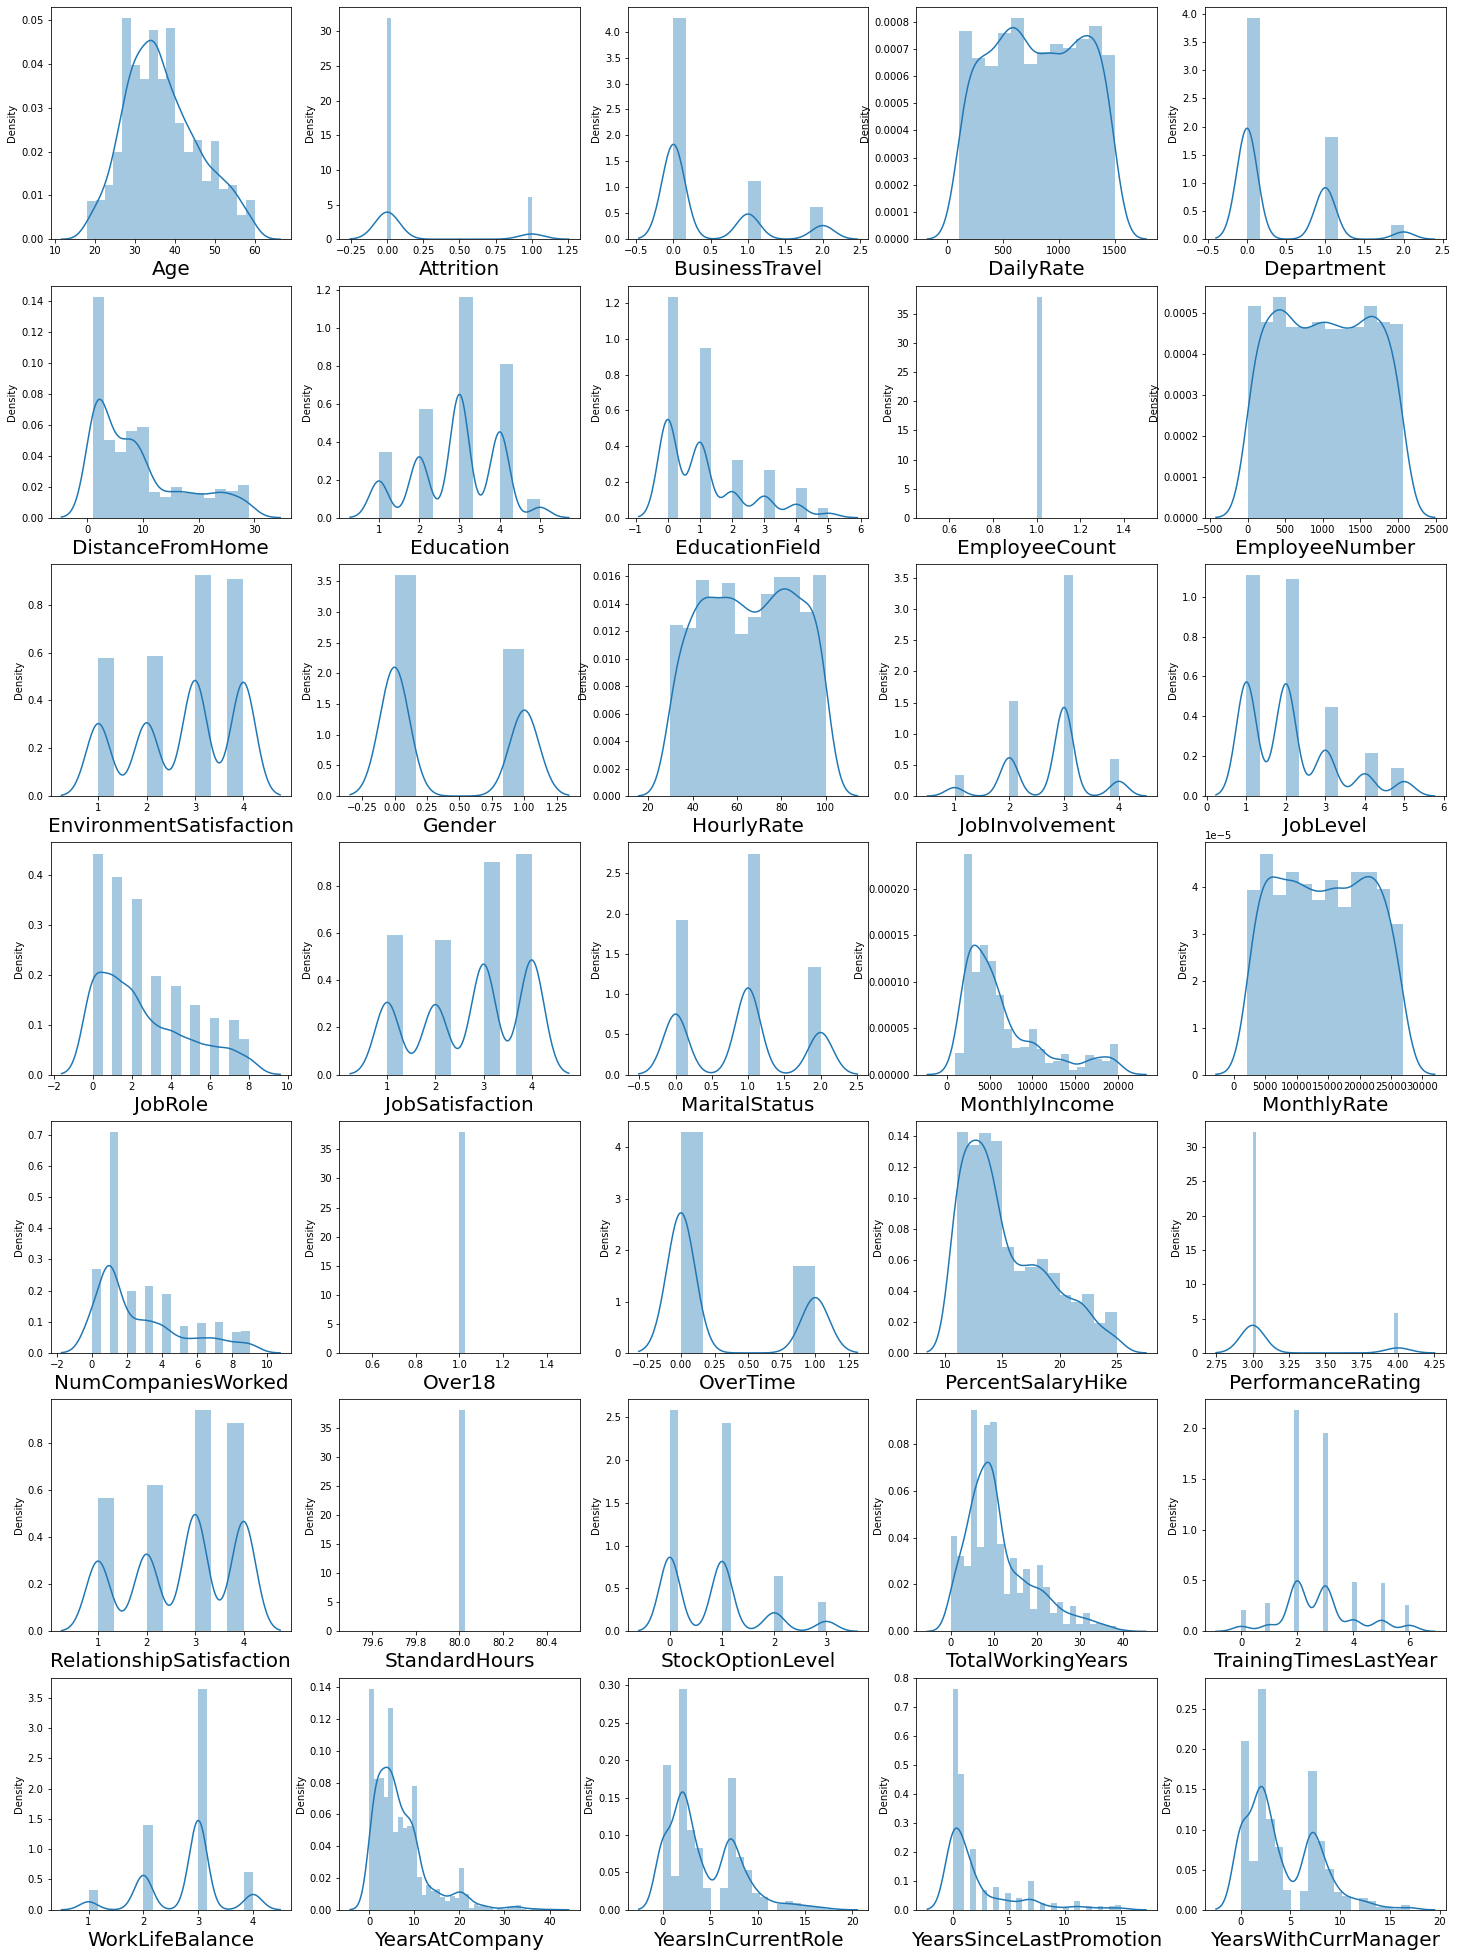

In [11]:
plt.figure(figsize = (25,35))
plotnumber = 1

for column in hr:
    if plotnumber <= 35: 
        ax = plt.subplot(7,5, plotnumber)
        sns.distplot (hr[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()


### Observation

1. There is skweness in our some of the features while others are distributed
2. We will further sort the data in ascending to check skwness


In [12]:
A = hr.skew().sort_values(ascending = True)
A

WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
HourlyRate                 -0.032311
DailyRate                  -0.003519
StandardHours               0.000000
Over18                      0.000000
EmployeeCount               0.000000
EmployeeNumber              0.016574
MonthlyRate                 0.018578
MaritalStatus               0.152175
Gender                      0.408665
Age                         0.413286
TrainingTimesLastYear       0.553124
JobRole                     0.770149
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
D

Checking if our data have any outliers using box plot.

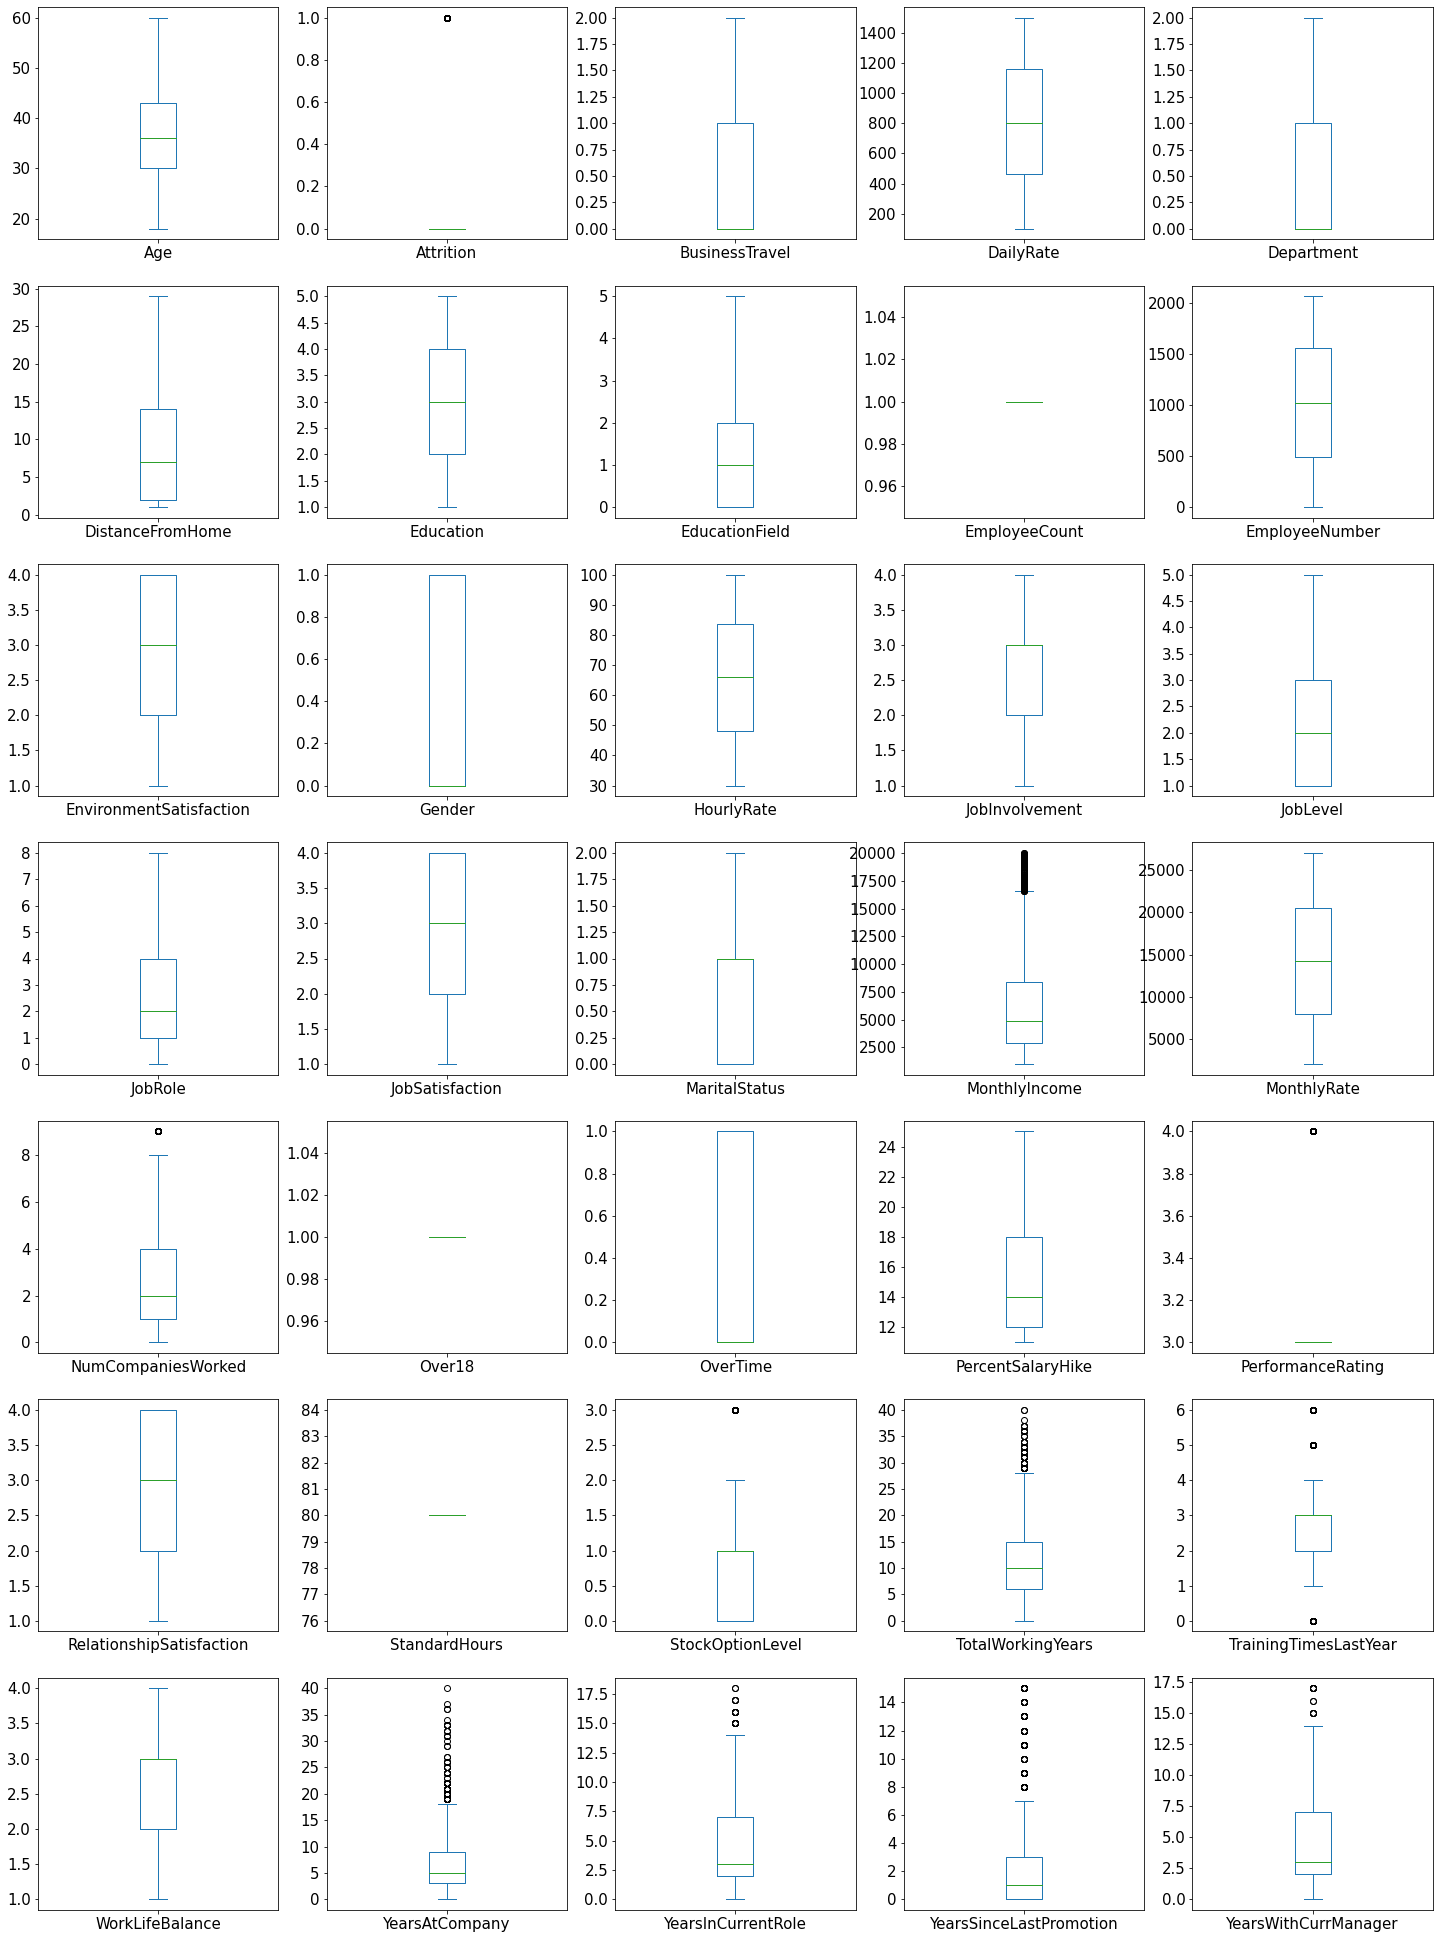

In [13]:

hr.plot(kind='box',subplots=True,layout=(7,5),figsize=(25,35), fontsize = 15)
plt.show()

Observation
1. Monthly income have too much outliers as per our graph followed by YearsAtCompany.
2. There are 4 more columsn with out liers
3. We will further need to remove this outliers to correct our data
4. Further will remove Outliers using IQR.

In [14]:


# Find the IQR (inter quatile range) to identityfy outliers

# 1st Quantile
q1 = hr.quantile(0.25)

# 3rd Quantile 

q3 = hr.quantile (0.75)

#IQR (inter quantile range)

iqr = q3 - q1

In [15]:
print (q1)
print ('-'* 50)
print (q3)
print ('-'* 50)
print (iqr)

Age                           30.00
Attrition                      0.00
BusinessTravel                 0.00
DailyRate                    465.00
Department                     0.00
DistanceFromHome               2.00
Education                      2.00
EducationField                 0.00
EmployeeCount                  1.00
EmployeeNumber               491.25
EnvironmentSatisfaction        2.00
Gender                         0.00
HourlyRate                    48.00
JobInvolvement                 2.00
JobLevel                       1.00
JobRole                        1.00
JobSatisfaction                2.00
MaritalStatus                  0.00
MonthlyIncome               2911.00
MonthlyRate                 8047.00
NumCompaniesWorked             1.00
Over18                         1.00
OverTime                       0.00
PercentSalaryHike             12.00
PerformanceRating              3.00
RelationshipSatisfaction       2.00
StandardHours                 80.00
StockOptionLevel            

In [16]:
# Removing outlier for MonthlyIncome

MonthlyIncome_high = (q3.MonthlyIncome + (1.5* iqr.MonthlyIncome))
MonthlyIncome_high

16581.0

In [17]:
index_Y = np.where(hr['MonthlyIncome']>MonthlyIncome_high)
index_Y

(array([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,  165,
         186,  187,  190,  194,  231,  233,  237,  244,  257,  263,  270,
         279,  280,  290,  314,  326,  329,  379,  392,  400,  411,  417,
         425,  429,  445,  466,  473,  477,  489,  497,  535,  538,  561,
         568,  584,  588,  592,  595,  609,  653,  699,  710,  714,  716,
         741,  746,  749,  755,  766,  770,  774,  799,  804,  810,  814,
         851,  858,  861,  867,  869,  894,  898,  899,  904,  907,  913,
         916,  918,  922,  936,  937,  945,  954,  955,  956,  999, 1008,
        1009, 1024, 1043, 1055, 1080, 1116, 1126, 1129, 1135, 1140, 1154,
        1184, 1185, 1225, 1242, 1264, 1277, 1330, 1331, 1348, 1351, 1374,
        1377, 1401, 1437, 1443], dtype=int64),)

In [18]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1356, 35)

In [19]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,0,591,0,2,1,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1352,1466,39,0,0,613,0,6,1,1,1,...,1,80,1,9,5,3,7,7,1,7
1353,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1354,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [20]:
# Removing outlier for NumCompaniesWorked_high

NumCompaniesWorked_high = (q3.NumCompaniesWorked + (1.5* iqr.NumCompaniesWorked))
NumCompaniesWorked_high

8.5

In [21]:
index_Y = np.where(hr['NumCompaniesWorked']>NumCompaniesWorked_high)
index_Y

(array([   4,   36,   47,   91,  114,  183,  193,  226,  263,  306,  343,
         344,  356,  363,  370,  405,  411,  420,  484,  498,  501,  508,
         530,  548,  567,  573,  609,  662,  697,  717,  727,  750,  771,
         847,  864,  871,  913,  945, 1023, 1047, 1063, 1073, 1118, 1159,
        1191, 1248, 1329], dtype=int64),)

In [22]:

hr = hr.drop(hr.index[index_Y])
hr.shape

(1309, 35)

In [23]:
# reindex the position of our dataset
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1305,1466,39,0,0,613,0,6,1,1,1,...,1,80,1,9,5,3,7,7,1,7
1306,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1307,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [24]:
# Removing outlier for StockOptionLevel

StockOptionLevel_high = (q3.StockOptionLevel + (1.5* iqr.StockOptionLevel))
StockOptionLevel_high

2.5

In [25]:
index_Y = np.where(hr['StockOptionLevel']>StockOptionLevel_high)
index_Y

(array([   5,   57,   58,   76,   81,   85,  108,  130,  162,  174,  184,
         200,  215,  260,  270,  286,  297,  300,  366,  379,  386,  464,
         517,  541,  569,  580,  605,  647,  687,  694,  702,  709,  714,
         717,  751,  763,  764,  765,  766,  770,  789,  795,  828,  843,
         855,  856,  860,  869,  910,  942,  966,  968, 1000, 1010, 1019,
        1036, 1051, 1057, 1067, 1080, 1085, 1091, 1106, 1111, 1116, 1120,
        1130, 1140, 1163, 1181, 1183, 1190, 1241, 1244, 1257, 1281, 1296],
       dtype=int64),)

In [26]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1232, 35)

In [27]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1228,1466,39,0,0,613,0,6,1,1,1,...,1,80,1,9,5,3,7,7,1,7
1229,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1230,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [28]:
# Removing outlier for TotalWorkingYears

TotalWorkingYears_high = (q3.TotalWorkingYears + (1.5* iqr.TotalWorkingYears))
TotalWorkingYears_high

28.5

In [29]:
index_Y = np.where(hr['TotalWorkingYears']>TotalWorkingYears_high)
index_Y

(array([  16,   74,   84,  105,  344,  357,  452,  465,  518,  524,  527,
         548,  573,  631,  644,  746,  762,  797,  800,  805,  810,  836,
         876,  905,  928,  949,  984, 1083], dtype=int64),)

In [30]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1204, 35)

In [31]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1200,1466,39,0,0,613,0,6,1,1,1,...,1,80,1,9,5,3,7,7,1,7
1201,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1202,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [32]:
# Removing outliers for TrainingTimesLastYear

TrainingTimesLastYear_high = (q3.TrainingTimesLastYear + (1.5* iqr.TrainingTimesLastYear))
TrainingTimesLastYear_high

4.5

In [33]:
index_Y = np.where(hr['TrainingTimesLastYear']>TrainingTimesLastYear_high)
index_Y

(array([   8,   14,   17,   20,   22,   26,   27,   28,   35,   78,   85,
          90,   96,   97,  133,  143,  153,  156,  158,  162,  163,  176,
         177,  179,  185,  187,  189,  197,  206,  217,  218,  226,  229,
         231,  241,  261,  272,  284,  290,  296,  298,  306,  308,  309,
         323,  324,  328,  334,  337,  342,  353,  358,  371,  379,  385,
         392,  401,  421,  427,  433,  443,  451,  453,  455,  467,  471,
         497,  511,  518,  556,  563,  569,  575,  578,  579,  591,  601,
         613,  617,  621,  633,  637,  641,  643,  649,  655,  669,  684,
         702,  709,  724,  728,  729,  731,  740,  748,  751,  757,  766,
         771,  772,  781,  786,  797,  808,  831,  833,  841,  843,  864,
         868,  871,  872,  889,  893,  898,  908,  910,  911,  922,  933,
         938,  941,  951,  952,  958,  963,  974,  978, 1002, 1013, 1015,
        1028, 1032, 1040, 1043, 1045, 1048, 1055, 1069, 1080, 1081, 1097,
        1098, 1129, 1130, 1131, 1132, 

In [34]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1046, 35)

In [35]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1464,26,0,0,1167,1,5,3,4,1,...,4,80,0,5,2,3,4,2,0,0
1042,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1043,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1044,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [36]:
YearsAtCompany_high = (q3.YearsAtCompany + (1.5* iqr.YearsAtCompany))
YearsAtCompany_high

18.0

In [37]:
index_Y = np.where(hr['YearsAtCompany']>YearsAtCompany_high)
index_Y

(array([  19,   45,   67,  109,  157,  178,  191,  198,  208,  213,  223,
         280,  316,  378,  513,  536,  545,  564,  602,  626,  657,  672,
         686,  700,  762,  775,  777,  862,  864,  913,  918,  974,  993,
         994, 1025, 1039], dtype=int64),)

In [38]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1010, 35)

In [39]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1464,26,0,0,1167,1,5,3,4,1,...,4,80,0,5,2,3,4,2,0,0
1006,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1007,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1008,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [40]:
# Removingoutlier for YearsInCurrentRole

YearsInCurrentRole_high = (q3.YearsInCurrentRole + (1.5* iqr.YearsInCurrentRole))
YearsInCurrentRole_high

14.5

In [41]:
index_Y = np.where(hr['YearsInCurrentRole']>YearsInCurrentRole_high)
index_Y

(array([785, 789, 981], dtype=int64),)

In [42]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(1007, 35)

In [43]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1464,26,0,0,1167,1,5,3,4,1,...,4,80,0,5,2,3,4,2,0,0
1003,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
1004,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
1005,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [44]:
# Removing outlier for YearsSinceLastPromotion

YearsSinceLastPromotion_high = (q3.YearsSinceLastPromotion + (1.5* iqr.YearsSinceLastPromotion))
YearsSinceLastPromotion_high

7.5

In [45]:
index_Y = np.where(hr['YearsSinceLastPromotion']>YearsSinceLastPromotion_high)
index_Y

(array([ 12,  29,  37,  43,  76, 148, 185, 186, 214, 218, 223, 266, 267,
        273, 300, 346, 347, 351, 356, 486, 490, 493, 514, 526, 528, 654,
        723, 742, 825, 829, 831, 962, 966, 987, 989], dtype=int64),)

In [46]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(972, 35)

In [47]:
hr.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1464,26,0,0,1167,1,5,3,4,1,...,4,80,0,5,2,3,4,2,0,0
968,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
969,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
970,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


In [48]:
# Removing outlier for YearsWithCurrManager

YearsWithCurrManager_high = (q3.YearsWithCurrManager + (1.5* iqr.YearsWithCurrManager))
YearsWithCurrManager_high

14.5

In [49]:
index_Y = np.where(hr['YearsWithCurrManager']>YearsWithCurrManager_high)
index_Y

(array([103, 422, 464], dtype=int64),)

In [50]:
hr = hr.drop(hr.index[index_Y])
hr.shape

(969, 35)

In [51]:
# reindexing all postion of our dataset

new_hr = hr.reset_index()
new_hr

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1102,1,1,2,0,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,0,8,1,0,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,0,1373,0,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,0,3,4,0,1,...,3,80,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,0,2,2,0,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1464,26,0,0,1167,1,5,3,4,1,...,4,80,0,5,2,3,4,2,0,0
965,1465,36,0,1,884,0,23,2,1,1,...,3,80,1,17,3,3,5,2,0,3
966,1467,27,0,0,155,0,4,3,0,1,...,2,80,1,6,0,3,6,2,0,3
967,1468,49,0,1,1023,1,2,3,1,1,...,4,80,0,17,3,2,9,6,0,8


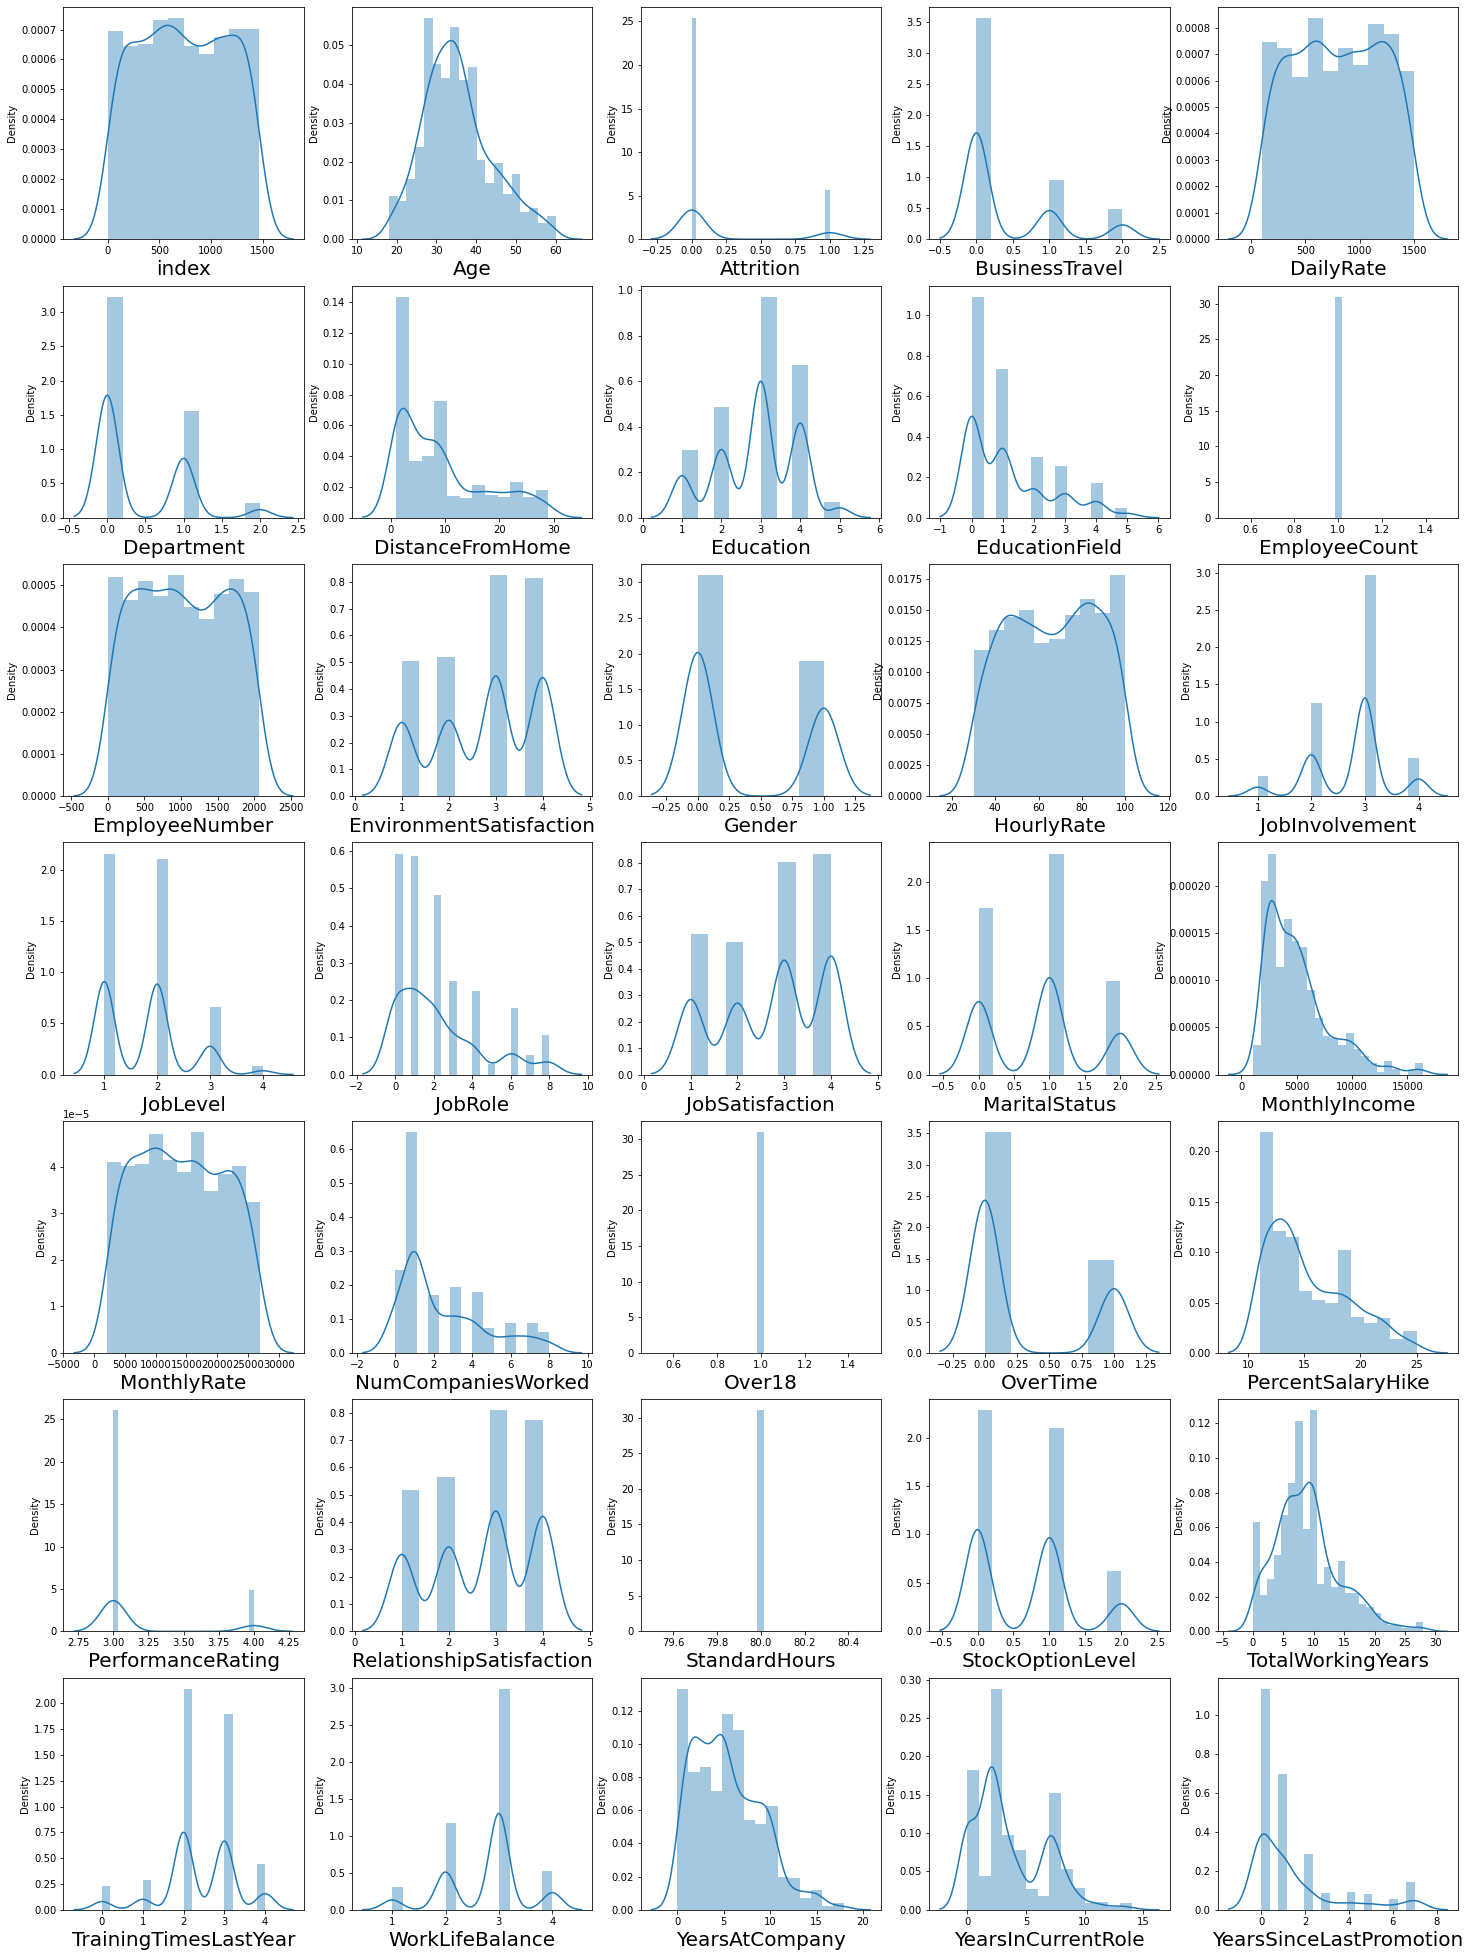

In [52]:
# Further need to check skwness after removingoutlier


plt.figure(figsize = (25,35))
plotnumber = 1

for column in new_hr:
    if plotnumber <= 35: 
        ax = plt.subplot(7,5, plotnumber)
        sns.distplot (new_hr[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

Observation
1. After skweing and removing outliers of ourdata, it have bit changed.
2. We will further check correlation of each column
3. We will use correlation metrics for the same and will use heatmap to visvalize the data


In [53]:
# assinging varable to correlation

correlation = new_hr.corr()

<AxesSubplot:>

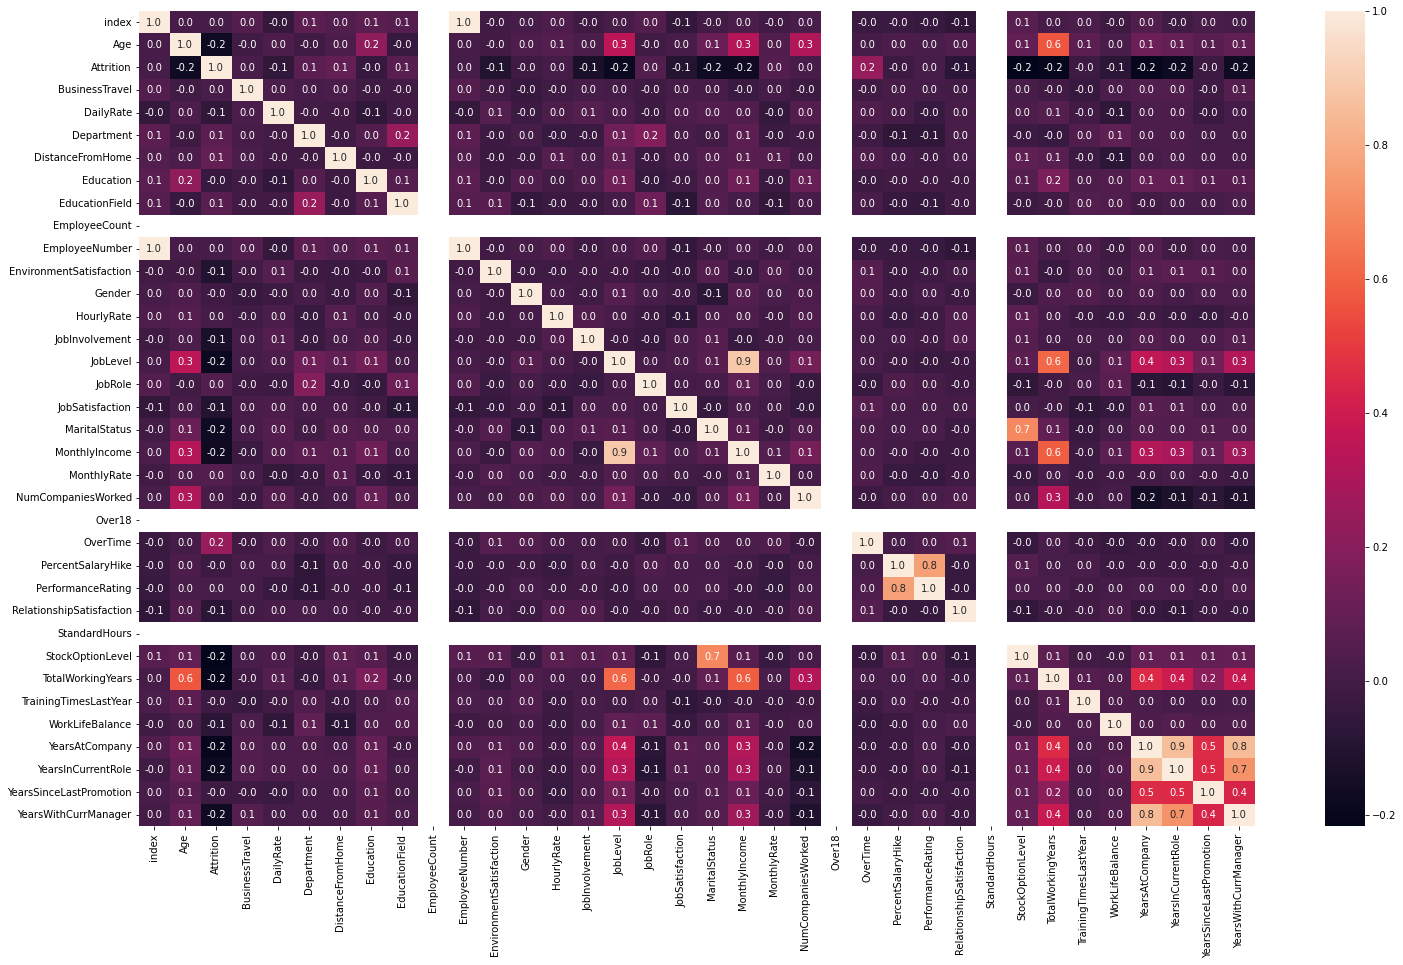

In [54]:
# plotting heatmap to see corelation of each column with other

plt.figure (figsize = (25,15))
sns.heatmap (correlation, fmt = '.1f', annot = True)

Observation
1. Employee count, over 18 and standard hours have better correlation with other column
2. Other are bit correlated but have high negative impact
3. Need to further check and select best model for our dataset

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

We will further sepearte target column and all other features.
Need to assign X to all other freatures and Y to Attrition


In [56]:
X = new_hr.drop('Attrition', axis = 1)
X

,index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,2,37,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,3,33,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,5,32,1,1005,0,2,2,0,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1464,26,0,1167,1,5,3,4,1,2060,...,4,80,0,5,2,3,4,2,0,0
965,1465,36,1,884,0,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
966,1467,27,0,155,0,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
967,1468,49,1,1023,1,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [57]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [58]:
Y = new_hr['Attrition'].apply(lambda Y_value : 1 if Y_value >= 1 else 0 )
Y

0      1
1      0
2      1
3      0
4      0
      ..
964    0
965    0
966    0
967    0
968    0
Name: Attrition, Length: 969, dtype: int64

### Spliting data into training and testing data (X and Y)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=3)

In [60]:
print (Y.shape, Y_train.shape, Y_test.shape)

(969,) (775,) (194,)


### Random Forest

In [61]:
model = RandomForestClassifier ()
model.fit (X_train, Y_train)

RandomForestClassifier()

In [62]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction, Y_test)
print ('Accuracy = ', test_data_accuracy)

Accuracy =  0.8556701030927835


In [63]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score (X_train_prediction, Y_train)
print ('Accuracy = ', train_data_accuracy)

Accuracy =  1.0


### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [65]:
def metric_score (Knn, X_train, X_test, Y_train, Y_test,train = True):
    if train:
        Y_pred = Knn.predict(X_train)
        
        print ('\n======Train Result=====')
        print (f'Accuracy Score :{accuracy_score(Y_train, Y_pred)*100:.2f}%')
        
    elif train == False:
        pred = Knn.predict(X_test)
        
        print ('\n======Train Result=====')
        print (f'Accuracy Score :{accuracy_score(Y_test, pred)*100:.2f}%')
        
        print ('\n \n Test Classification Report \n', classification_report (Y_test, pred, digits = 2))

In [66]:
Knn = KNeighborsClassifier()
Knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [67]:
metric_score(Knn ,X_train,X_test, Y_train, Y_test, train = True)

metric_score(Knn , X_train, X_test, Y_train, Y_test, train = False)


======Train Result=====
Accuracy Score :82.71%

======Train Result=====
Accuracy Score :79.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       162
           1       0.11      0.03      0.05        32

    accuracy                           0.80       194
   macro avg       0.47      0.49      0.47       194
weighted avg       0.71      0.80      0.75       194



In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,power_transform
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=93)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(X_train,Y_train)
    predlr=model.predict(X_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(Y_test,predlr)*100)
    print(confusion_matrix(Y_test,predlr))
    print(classification_report(Y_test,predlr))
    print('------------------------------------')

Model Name LogisticRegression()
Accuracy 82.13058419243985
[[237   2]
 [ 50   2]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       239
           1       0.50      0.04      0.07        52

    accuracy                           0.82       291
   macro avg       0.66      0.52      0.49       291
weighted avg       0.77      0.82      0.75       291

------------------------------------
Model Name KNeighborsClassifier()
Accuracy 80.41237113402062
[[228  11]
 [ 46   6]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       239
           1       0.35      0.12      0.17        52

    accuracy                           0.80       291
   macro avg       0.59      0.53      0.53       291
weighted avg       0.75      0.80      0.76       291

------------------------------------
Model Name DecisionTreeClassifier()
Accuracy 72.5085910652921
[[196  43]
 [ 37  15]]
              precisi

In [70]:
from sklearn.model_selection import cross_val_score

for model in models:
    scr=cross_val_score(model,X,Y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  82.35457507611773
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  80.38993643501951
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  75.75022701778751
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  83.48859569467443
---------------------------------------



#### HyperParameter tuning to get best accurate scores
## Grid Serach CV

In [71]:

KNC=KNeighborsClassifier(n_neighbors=7)
KNC.fit(X_train,Y_train)
pred=KNC.predict(X_test)
acc_score=accuracy_score(Y_test,pred)
print("Accuracy score",(acc_score)*100)


Accuracy score 82.4742268041237


#### We have predicted 82% accuracy using KNC prediction

## Saving model

In [72]:
import joblib

In [73]:
joblib.dump(KNC.predict,'HR Attrition ')

['HR Attrition ']